<h1 style="text-align: center;" markdown="1">Riconoscimento numeri scritti a mano</h1>

## 1. 0 MNIST dataset
Per creare una rete neurale "**Multi-Layer Perceptrons**" per il riconoscimento di numeri scritti a mano abbiamo bisogno di un dataset adatto. Per questo Keras ci mette a disposizione il dataset **MNIST** che è un dataset di immagini 28x28 pixels con all'interno 70.000 immagini di numeri scritti a mano, dove ad ogni immagine abbiamo il numero rappresentato. Questo dataset è diviso in train e test con rispettivamente 60.000 e 10.000 immagini.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# carichiamo (downloaded se necessario il MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Una volta caricato in memoria (se necessario il dataset viene scaricato automaticamente) siamo pronti per visualizzare un sub-set di esso, per vedere di che cosa stiamo parlando. Quindi grazie alla libreria matplotlib prendiamo le prime 4 immagini dal dataset e le mostriamo a video.

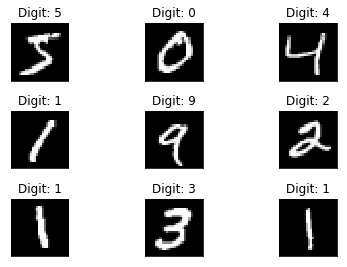

In [2]:
# plot 4 images as gray scale
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
# show the plot
plt.show()

## 2.0 Neural Network Semplice

#### Abbiamo bisogno di un modello complesso per effettuare un riconoscimento di immagini di questo tipo in maniera efficace?

Siamo in grado di avere buoni risultati con una semplice rete neurale con un solo "hidden layer". Infatti, in questa sezione saremo in grado di creare una rete neurale con un errore sull'intorno del 1.80%. 

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output

Il set di dati di train è strutturato come una matrice tridimensionale composta da istanza, larghezza dell'immagine e altezza dell'immagine. Per un modello Multi-Layer Perceptrons dobbiamo ridurre le immagini in un vettore di pixel. In questo caso, le immagini di dimensioni 28 x 28 saranno transformati in vettori da 784 pixel di valori di input.

Possiamo fare questa trasformazione facilmente usando la funzione reshape () della libreria NumPy. Possiamo inoltre ridurre i nostri requisiti di memoria forzando la precisione dei valori dei pixel a 32 bit, la precisione predefinita utilizzata da Keras in ogni caso.

In [4]:
# Fissiamo un seed random per essere in grado di riprodurre l'esempio
numpy.random.seed(123)
# Carichiamo i dati
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# da immagini 28x28 le trasformiamo in un vettore di dimensione 784 per ciascun immagine 
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

I valori dei pixel sono in scala di grigi tra 0 e 255. È quasi sempre una buona idea eseguire un ridimensionamento dei valori di input quando si utilizzano modelli di rete neurali. Poiché la scala è ben nota, possiamo normalizzare molto velocemente i valori dei pixel nell'intervallo 0 e 1 dividendo ogni valore per il massimo di 255.

In [5]:
# Normalizziamo gli input da 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255

Infine, la variabile di output è un numero intero compreso tra 0 e 9. Si tratta di un problema di classificazione multi-classe. Pertanto, è buona norma utilizzare una codifica dei valori di classe, trasformando il vettore di numeri di classe in una matrice binaria.

Possiamo farlo facilmente utilizzando la funzione di supporto integrata np_utils.to_categorical () in Keras.

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Il modello è una semplice rete neurale con un hidden layer con lo stesso numero di neuroni quanti sono gli input (784).

Una funzione di attivazione softmax viene utilizzata sul livello di output per trasformare le uscite in valori di probabilità e consentire a una classe di 10 di essere selezionata come previsione di output del modello. La perdita logaritmica viene utilizzata come funzione di perdita (chiamata categorical_crossentropy in Keras) e l'efficiente algoritmo di discesa del gradiente ADAM viene utilizzato per apprendere i pesi.

<img src="img/nn.png" alt="Drawing" style="width: 500px;"/>

In [7]:
# Definizione del modello
def baseline_model():
    # Creazione del modello
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compilazione del modello
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Ora possiamo addestrare e valutare il modello. Il modello è addestrato per oltre 10 epoche con aggiornamenti ogni 200 immagini. I dati del test vengono utilizzati come set di dati di convalida, consentendo di vedere l'abilità del modello mentre si allena. 
Infine, il set di dati di test viene utilizzato per valutare il modello e viene stampato un tasso di errore di classificazione.

In [8]:
# Costruiamo il modello
model = baseline_model()
# Addestriamo il modello
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
#Valutazione finale del modello
scores = model.evaluate(X_test, y_test, verbose=0)
print("Errore: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2835 - acc: 0.9186 - val_loss: 0.1335 - val_acc: 0.9621
Epoch 2/10
 - 3s - loss: 0.1107 - acc: 0.9682 - val_loss: 0.0984 - val_acc: 0.9701
Epoch 3/10
 - 3s - loss: 0.0712 - acc: 0.9795 - val_loss: 0.0769 - val_acc: 0.9757
Epoch 4/10
 - 3s - loss: 0.0502 - acc: 0.9852 - val_loss: 0.0685 - val_acc: 0.9784
Epoch 5/10
 - 3s - loss: 0.0368 - acc: 0.9896 - val_loss: 0.0634 - val_acc: 0.9809
Epoch 6/10
 - 3s - loss: 0.0267 - acc: 0.9932 - val_loss: 0.0566 - val_acc: 0.9824
Epoch 7/10
 - 3s - loss: 0.0190 - acc: 0.9953 - val_loss: 0.0628 - val_acc: 0.9801
Epoch 8/10
 - 3s - loss: 0.0139 - acc: 0.9970 - val_loss: 0.0608 - val_acc: 0.9834
Epoch 9/10
 - 3s - loss: 0.0103 - acc: 0.9979 - val_loss: 0.0555 - val_acc: 0.9836
Epoch 10/10
 - 3s - loss: 0.0073 - acc: 0.9987 - val_loss: 0.0602 - val_acc: 0.9822
Errore: 1.78%


Per valutare al meglio dove il nostro modello sbaglia ci sono molti possibili metodi, ma in questo caso prendiamo uno molto semplice che si chiama **confusion matrix**. 

Wikipedia spiega: Nell'ambito dell'Intelligenza artificiale, la matrice di confusione, detta anche tabella di errata classificazione, restituisce una rappresentazione dell'accuratezza di classificazione statistica. Ogni colonna della matrice rappresenta i valori predetti, mentre ogni riga rappresenta i valori reali. L'elemento sulla riga i e sulla colonna j è il numero di casi in cui il classificatore ha classificato la classe "vera" i come classe j. Attraverso questa matrice è osservabile se vi è "confusione" nella classificazione di diverse classi.

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label giusta')
    plt.xlabel('Label predetta')

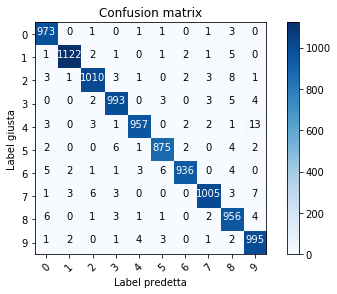

In [10]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

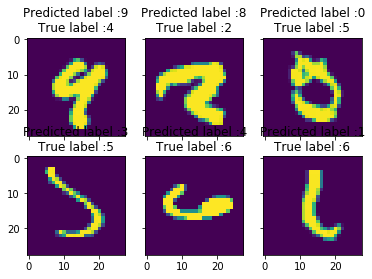

In [11]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)